In [1]:
# Imports
import numpy as np
from pathlib import Path
import importlib 
import massimal.pipeline
import matplotlib.pyplot as plt
from massimal.image_render import percentile_stretch

In [21]:
dataset_dir = Path('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301001-south-test_hsi')

In [22]:
importlib.reload(massimal.pipeline)
pipeline = massimal.pipeline.PipelineProcessor(dataset_dir)
imu_parser = massimal.pipeline.ImuDataParser()


10:23:17 INFO: File logging initialized.


In [23]:
# for i,imu_data_path in enumerate(pipeline.imu_data_paths):
#     imu_data = imu_parser.read_imu_json_file(imu_data_path)
#     im_flight_meta = massimal.pipeline.ImageFlightMetadata(imu_data,(2000,900,270))
#     if im_flight_meta is not None:
#         print(im_flight_meta)
#     else:
#         print(f'Returned None for {i}')

In [24]:
refl_im, wl, metadata = massimal.pipeline.read_envi(pipeline.refl_im_paths[2])

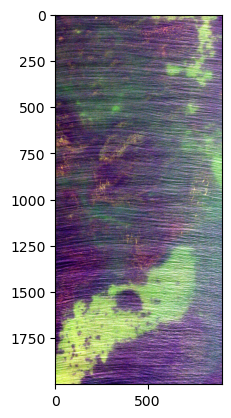

In [25]:
plt.imshow(percentile_stretch(refl_im[:,:,[122,74,20]]))

In [28]:
pipeline.imu_data_paths

[PosixPath('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301001-south-test_hsi/1_radiance/massimal_larvik_olbergholmen_202308301001-south-test_hsi_000_imudata.json'),
 PosixPath('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301001-south-test_hsi/1_radiance/massimal_larvik_olbergholmen_202308301001-south-test_hsi_001_imudata.json'),
 PosixPath('/media/mha114/Massimal2/seabee-minio/larvik/olbergholmen/aerial/hsi/20230830/massimal_larvik_olbergholmen_202308301001-south-test_hsi/1_radiance/massimal_larvik_olbergholmen_202308301001-south-test_hsi_002_imudata.json')]

In [26]:
imu_data = imu_parser.read_imu_json_file(pipeline.imu_data_paths[2])

In [27]:
importlib.reload(massimal.pipeline)
im_flight_meta = massimal.pipeline.ImageFlightMetadata(imu_data,refl_im.shape)

Setting image origin to [ 565022.24547465 6541376.80621292]


In [8]:
print(f'{im_flight_meta.utm_epsg}')
print(f'{im_flight_meta.utm_x[0]=}')
print(f'{im_flight_meta.utm_y[0]=}')
print(f'{im_flight_meta.image_origin=}')
print(f'{im_flight_meta.camera_origin=}')
print(f'{im_flight_meta.v_alongtrack=}')
print(f'{im_flight_meta.u_alongtrack=}')
print(f'{im_flight_meta.u_crosstrack=}')
print(f'{im_flight_meta.gsd_alongtrack=}')
print(f'{im_flight_meta.gsd_crosstrack=}')
print(f'{im_flight_meta.swath_length=}')
print(f'{im_flight_meta.swath_width=}')
print(f'{im_flight_meta.altitude_offset=}')
print(f'{im_flight_meta.mean_altitude=}')
print(f'{im_flight_meta.t_total=}')
print(f'{im_flight_meta.dt=}')
print(f'{im_flight_meta.utm_epsg=}')


32632
im_flight_meta.utm_x[0]=565037.979542598
im_flight_meta.utm_y[0]=6541382.242455596
im_flight_meta.image_origin=array([ 565022.24547465, 6541376.80621292])
im_flight_meta.camera_origin=array([ 565037.9795426, 6541382.2424556])
im_flight_meta.v_alongtrack=array([ 1.20865856, -3.49820952])
im_flight_meta.u_alongtrack=array([ 0.32656519, -0.94517468])
im_flight_meta.u_crosstrack=array([0.94517468, 0.32656519])
im_flight_meta.gsd_alongtrack=0.03699273392416713
im_flight_meta.gsd_crosstrack=0.03699273392416713
im_flight_meta.swath_length=73.98546784833427
im_flight_meta.swath_width=33.29346053175042
im_flight_meta.altitude_offset=0.0
im_flight_meta.mean_altitude=50.48279801274032
im_flight_meta.t_total=19.989995016581776
im_flight_meta.dt=0.009994997508290889
im_flight_meta.utm_epsg=32632


In [9]:
im_flight_meta.get_image_transform()

(0.03496459543379024,
 0.012080539281654638,
 565022.2454746529,
 0.012080539281654638,
 -0.03496459543379024,
 6541376.80621292)